In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = '/content/drive/MyDrive/DataSet/2021_연간자료_20231228_12985.csv'
data = pd.read_csv(df, sep=',')
data

,2021,11,010,53,1,1900,1.1,3,3.1,S,...,11.1,8,7,1.2,3.2,1.3,2,31,17,14
0,2021,11,10,53,1,1900,4,4,1,S,...,9,2,2,NaN,NaN,NaN,NaN,27,18,9
1,2021,11,10,53,1,1914,8,5,1,J,...,4,NaN,NaN,NaN,NaN,NaN,NaN,5,1,4
2,2021,11,10,53,1,1918,5,3,1,S,...,1,NaN,NaN,NaN,3,3,NaN,8,7,1
3,2021,11,10,53,1,1923,10,5,1,O,...,2,NaN,NaN,NaN,NaN,NaN,NaN,19,17,2
4,2021,11,10,53,1,1945,4,3,3,S,...,3,NaN,NaN,NaN,NaN,NaN,NaN,6,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6079696,2021,39,20,62,2,2021,8,1,1,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1
6079697,2021,39,20,62,2,2021,9,1,1,G,...,NaN,2,1,1,NaN,NaN,NaN,3,1,2
6079698,2021,39,20,62,2,2021,9,1,1,G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1
6079699,2021,39,20,62,2,2021,9,1,1,I,...,1,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2


In [3]:
for i, row in tqdm(data.iterrows()):
    data.loc[i, '문자데이터_개수'] = row.str.contains(r'\*').sum()

0it [00:00, ?it/s]

<Axes: ylabel='문자데이터_개수'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  func(*args, 

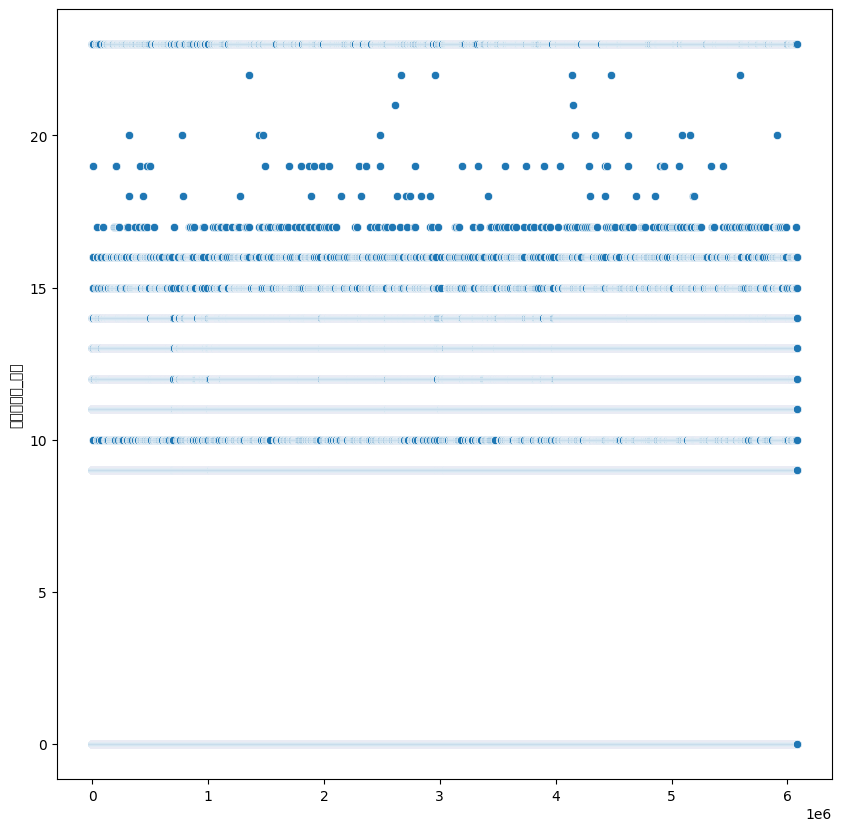

In [22]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data['문자데이터_개수'])

In [7]:
from scipy.stats import shapiro
print(shapiro(data['문자데이터_개수']))             # 통계량에 대한 p-value=0.0이므로 정규분포를 따른다는 귀무가설 기각 => 정규분포를 따르지 않음

ShapiroResult(statistic=0.1683698296546936, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [8]:
from scipy.stats import anderson
result = anderson(data['문자데이터_개수'])
result                                              # 유의수준 0.05%에 대하여 기각역 0.787을 넘어가므로 귀무가설 기각 => 정규분포를 따르지 않음

AndersonResult(statistic=2227532.459765575, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.3571968424105067, scale=2.0349262786767475)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [10]:
from scipy import stats
stats.kstest(data['문자데이터_개수'], 'norm')       # p-value=0.0이므로 귀무가설 기각 => 정규분포를 따르지 않음

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

In [5]:
for i, row in tqdm(data.iterrows()):
    data.loc[i, 'null_counts'] = row.isnull().sum()

0it [00:00, ?it/s]

<Axes: ylabel='null_counts'>

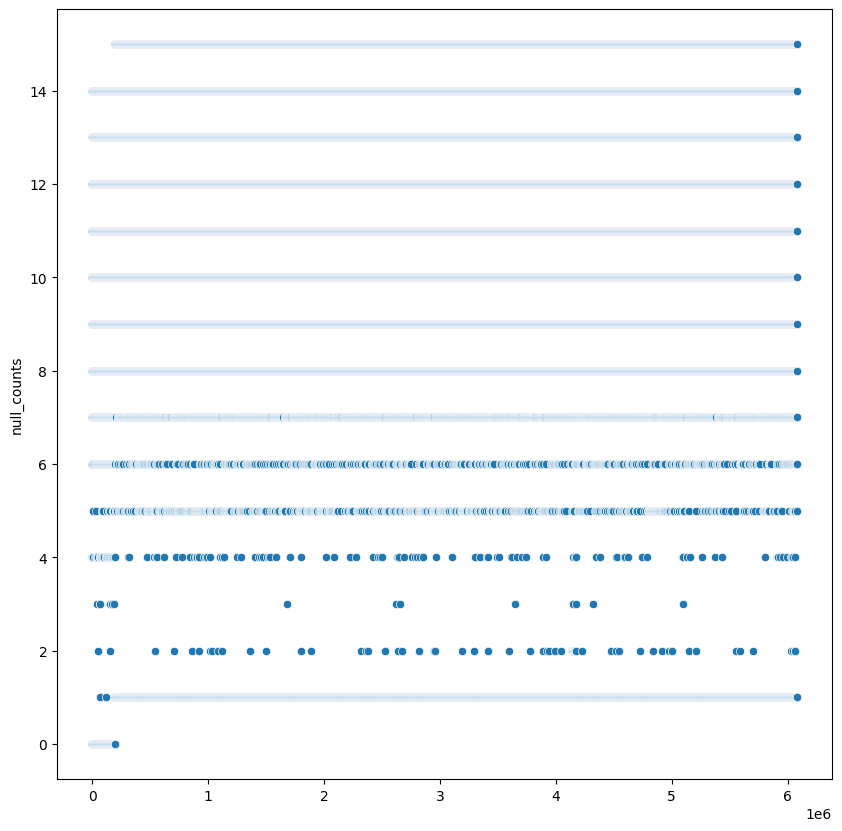

In [21]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data['null_counts'])

In [11]:
from scipy.stats import shapiro
print(shapiro(data['null_counts']))                 # 통계량에 대한 p-value=0.0이므로 정규분포를 따른다는 귀무가설 기각 => 정규분포를 따르지 않음

ShapiroResult(statistic=0.6444076299667358, pvalue=0.0)


In [12]:
from scipy.stats import anderson
result = anderson(data['null_counts'])
result                                              # 유의수준 0.05%에 대하여 기각역 0.787을 넘어가므로 귀무가설 기각 => 정규분포를 따르지 않음

AndersonResult(statistic=457401.61396983825, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=13.359917206454725, scale=2.2346228999313174)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [13]:
from scipy import stats
stats.kstest(data['null_counts'], 'norm')           # p-value=0.0이므로 귀무가설 기각 => 정규분포를 따르지 않음

KstestResult(statistic=0.9865485584314346, pvalue=0.0, statistic_location=5.0, statistic_sign=-1)

In [14]:
# 결측치 빈도와 문자열 빈도 상관성 검정

c, p = stats.pearsonr(x=data['문자데이터_개수'], y=data['null_counts'])
print(f'stats: {c:.2f} p-value: {p:.2f}')
# p-value=0.00 < 0.05로, 귀무가설 기각 => 두 변수는 서로 상관관계가 있음

stats: -0.10 p-value: 0.00


In [16]:
# 결측치 빈도와 문자열 빈도 쌍체 검정

t, p = stats.ttest_rel(a=data['문자데이터_개수'], b=data['null_counts'])
print(f'stats: {t:.2f} p-value: {p:.2f}')
# p-value=0.00 < 0.05로, 두 분포 간 평균에 차이가 있음

stats: -10096.60 p-value: 0.00


In [23]:
cat_columns = ['문자데이터_개수', 'null_counts']

In [24]:
corr_mat = np.round(data[cat_columns].corr(), 4)
corr_mat_long = corr_mat.stack().reset_index(name="correlation")

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/ut

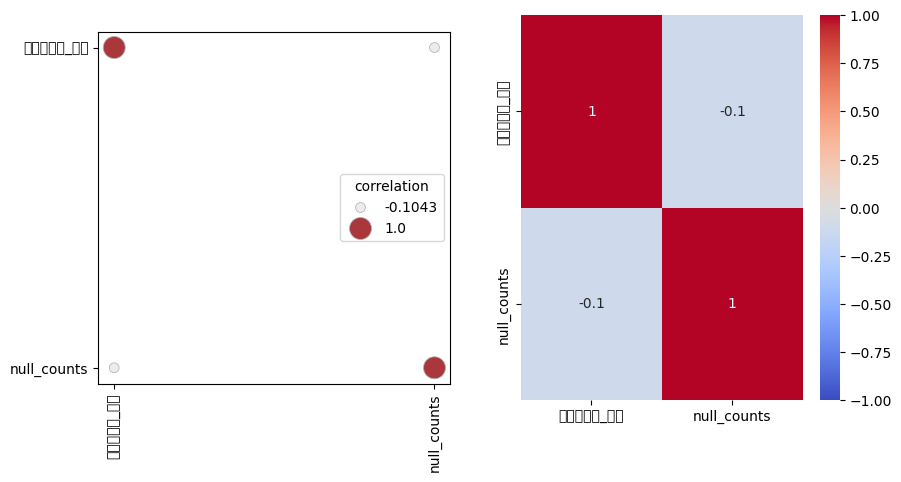

In [29]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
ax = sns.scatterplot(data=corr_mat_long, x="level_0", y="level_1", hue="correlation", palette="vlag", hue_norm=(-1, 1), edgecolor=".7", sizes=(50, 250), size="correlation")
ax.set(xlabel="", ylabel="", aspect="equal")
for label in ax.get_xticklabels():
  label.set_rotation(90)

plt.subplot(1, 2, 2)
heatmap = sns.heatmap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123:

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  func(*args, 

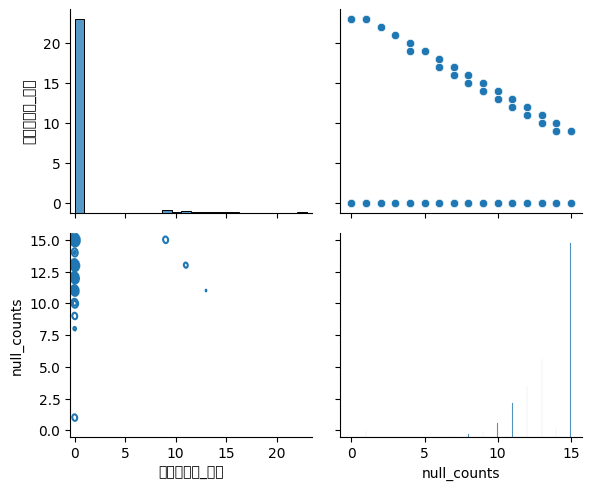

In [31]:
ax = sns.PairGrid(data[cat_columns], diag_sharey=False, aspect=1.2)
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)